# Rain in Seattle, 2014

Load the PRCP column from data/Seattle2014.csv dataset to get the tenths of mms of rain in Seattle, 2014. Convert the mms to inches (254 1/10 mms in 1 inch).

For calculating summer days, note that the first day of summer is the 172nd day of the year and there are 90 days in summer.

Answer the following questions:
- how many days did it rain?
- how many days did it not rain?
- how many days did it rain over half an inch?
- what is the average precipitation on rainy days?
- what's the median precipitation on summer days?
- what's the median precipitation on just rainy days in the summer?
- what's the median precipitation on non-summer rainy days?

Display a histogram of the amount of rain on rainy days using 10 bins.

In [3]:
import numpy as np
import pandas as pd

rainfall = pd.read_csv('./data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254  # 1/10mm -> inches
inches.shape

(365,)

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

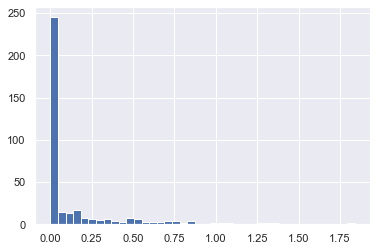

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

# histogram with 40 bins
plt.hist(inches, 40)

In [5]:
print("Number of days without rain: ", np.sum(inches == 0))

Number of days without rain:  215


In [6]:
print("Number of days with rain: ", np.sum(inches > 0))

Number of days with rain:  150


In [7]:
print("Days with more than 0.5 inches of rain: ", np.sum(inches > 0.5))

Days with more than 0.5 inches of rain:  37


In [8]:
print("Average rain on rainy days: ", np.mean(inches[inches > 0]))

Average rain on rainy days:  0.32356955380577423


In [9]:
# rainy days mask
rainy = (inches > 0)
# summer days mask
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)

In [10]:
print("Median precipitation on rainy days: ", np.median(inches[rainy]))

Median precipitation on rainy days:  0.19488188976377951


In [14]:
print("Median precipitation on rainy days in the summer: ", np.median(inches[rainy & summer]))

Median precipitation on rainy days in the summer:  0.0610236220472441


In [15]:
print("Median precipitation on non-summer rainy days: ", np.median(inches[rainy & ~summer]))

Median precipitation on non-summer rainy days:  0.20078740157480315


(array([75., 26., 19., 13.,  9.,  3.,  2.,  2.,  0.,  1.]),
 array([0.01181102, 0.19448819, 0.37716535, 0.55984252, 0.74251969,
        0.92519685, 1.10787402, 1.29055118, 1.47322835, 1.65590551,
        1.83858268]),
 <a list of 10 Patch objects>)

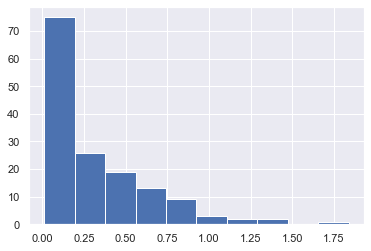

In [19]:
plt.hist(inches[rainy], 10)